In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df_main=pd.read_excel("Air Pollution Compiled.xlsx")
df=df_main.copy()
df

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,...,Toluene,Eth-Benzene,MP-Xylene,RH,WD,SR,BP,AT,RF,Xylene
0,01-11-2018 00:00,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,02-11-2018 00:00,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,03-11-2018 00:00,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,04-11-2018 00:00,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,05-11-2018 00:00,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1604,24-03-2023 00:00,97.99,182.33,8.68,22.01,18.55,16.49,13.73,1.76,29.68,...,23.58,None,None,65.28,110.5,96.65,975.29,21.29,0.09,2.27
1605,25-03-2023 00:00,36,75.71,2.91,14.66,10.17,15.53,13.44,1.39,54,...,5.3,None,None,62.34,119.21,164.67,977.96,22.28,0.01,0.5
1606,26-03-2023 00:00,57.16,152.12,2.01,12.07,8.06,14.6,14.79,1.35,48.79,...,7.07,None,None,55.15,202.57,200.64,977.53,22.89,0,0.71
1607,27-03-2023 00:00,55.17,134.12,2.24,14.36,9.47,14.08,15.47,1.09,52.68,...,12.11,None,None,57.33,279.37,215.01,976.89,21.94,0,0.46


In [3]:
# handling missing values
df = df.replace(to_replace=['None'], value=np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1609 entries, 0 to 1608
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1609 non-null   object 
 1   PM2.5        1579 non-null   float64
 2   PM10         1583 non-null   float64
 3   NO           1582 non-null   float64
 4   NO2          1582 non-null   float64
 5   NOx          1582 non-null   float64
 6   NH3          1567 non-null   float64
 7   SO2          1566 non-null   float64
 8   CO           1580 non-null   float64
 9   Ozone        1538 non-null   float64
 10  Benzene      1484 non-null   float64
 11  Toluene      1484 non-null   float64
 12  Eth-Benzene  0 non-null      float64
 13  MP-Xylene    6 non-null      float64
 14  RH           1583 non-null   float64
 15  WD           1583 non-null   float64
 16  SR           1583 non-null   float64
 17  BP           1582 non-null   float64
 18  AT           1582 non-null   float64
 19  RF    

In [4]:
df.isna().sum()/len(df)*100

Date             0.000000
PM2.5            1.864512
PM10             1.615911
NO               1.678061
NO2              1.678061
NOx              1.678061
NH3              2.610317
SO2              2.672467
CO               1.802362
Ozone            4.412679
Benzene          7.768800
Toluene          7.768800
Eth-Benzene    100.000000
MP-Xylene       99.627098
RH               1.615911
WD               1.615911
SR               1.615911
BP               1.678061
AT               1.678061
RF              54.505904
Xylene           7.893101
dtype: float64

In [5]:
df=df.dropna(thresh=df.shape[0]*0.5, axis=1)
df=df.drop(df.index[0:10])
df=df.reset_index(drop=True)
df

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,RH,WD,SR,BP,AT,Xylene
0,11-11-2018 00:00,251.16,439.83,1.75,83.25,45.69,39.29,23.07,1.57,39.13,6.70,17.96,76.73,240.05,29.55,992.08,19.86,0.31
1,12-11-2018 00:00,235.81,340.70,4.97,80.06,46.58,35.29,13.32,1.54,44.63,6.57,13.94,77.34,244.45,107.99,990.39,19.82,0.31
2,13-11-2018 00:00,285.09,428.91,16.67,111.32,72.80,41.51,21.87,1.34,31.22,8.68,43.54,78.66,219.97,77.29,988.21,20.48,0.91
3,14-11-2018 00:00,144.36,205.45,6.34,96.49,56.09,35.79,12.56,1.00,41.93,5.64,28.66,77.86,214.38,105.27,989.02,21.22,0.54
4,15-11-2018 00:00,109.24,154.94,6.91,77.06,46.79,30.92,12.69,0.65,28.81,4.17,33.59,79.27,185.82,112.20,992.52,19.82,0.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,24-03-2023 00:00,97.99,182.33,8.68,22.01,18.55,16.49,13.73,1.76,29.68,1.83,23.58,65.28,110.50,96.65,975.29,21.29,2.27
1595,25-03-2023 00:00,36.00,75.71,2.91,14.66,10.17,15.53,13.44,1.39,54.00,0.76,5.30,62.34,119.21,164.67,977.96,22.28,0.50
1596,26-03-2023 00:00,57.16,152.12,2.01,12.07,8.06,14.60,14.79,1.35,48.79,1.50,7.07,55.15,202.57,200.64,977.53,22.89,0.71
1597,27-03-2023 00:00,55.17,134.12,2.24,14.36,9.47,14.08,15.47,1.09,52.68,1.43,12.11,57.33,279.37,215.01,976.89,21.94,0.46


In [6]:
df.isna().sum()

Date         0
PM2.5       20
PM10        16
NO          17
NO2         17
NOx         17
NH3         32
SO2         33
CO          19
Ozone       61
Benzene    115
Toluene    115
RH          16
WD          16
SR          16
BP          17
AT          17
Xylene     117
dtype: int64

In [7]:
required_pollutants = ['PM10', 'PM2.5']
min_required_pollutants = 3

# Drop rows where both 'PM10' and 'PM2.5' are null
df.dropna(subset=required_pollutants, how='all', inplace=True)

In [8]:
valid_rows = df[(df['PM10'].notnull()) | (df['PM2.5'].notnull())]
print(len(valid_rows))
valid_rows = valid_rows[valid_rows.drop(required_pollutants, axis=1).count(axis=1) >= min_required_pollutants]

1584


In [9]:
df = df.loc[valid_rows.index]
df

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,RH,WD,SR,BP,AT,Xylene
0,11-11-2018 00:00,251.16,439.83,1.75,83.25,45.69,39.29,23.07,1.57,39.13,6.70,17.96,76.73,240.05,29.55,992.08,19.86,0.31
1,12-11-2018 00:00,235.81,340.70,4.97,80.06,46.58,35.29,13.32,1.54,44.63,6.57,13.94,77.34,244.45,107.99,990.39,19.82,0.31
2,13-11-2018 00:00,285.09,428.91,16.67,111.32,72.80,41.51,21.87,1.34,31.22,8.68,43.54,78.66,219.97,77.29,988.21,20.48,0.91
3,14-11-2018 00:00,144.36,205.45,6.34,96.49,56.09,35.79,12.56,1.00,41.93,5.64,28.66,77.86,214.38,105.27,989.02,21.22,0.54
4,15-11-2018 00:00,109.24,154.94,6.91,77.06,46.79,30.92,12.69,0.65,28.81,4.17,33.59,79.27,185.82,112.20,992.52,19.82,0.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,24-03-2023 00:00,97.99,182.33,8.68,22.01,18.55,16.49,13.73,1.76,29.68,1.83,23.58,65.28,110.50,96.65,975.29,21.29,2.27
1595,25-03-2023 00:00,36.00,75.71,2.91,14.66,10.17,15.53,13.44,1.39,54.00,0.76,5.30,62.34,119.21,164.67,977.96,22.28,0.50
1596,26-03-2023 00:00,57.16,152.12,2.01,12.07,8.06,14.60,14.79,1.35,48.79,1.50,7.07,55.15,202.57,200.64,977.53,22.89,0.71
1597,27-03-2023 00:00,55.17,134.12,2.24,14.36,9.47,14.08,15.47,1.09,52.68,1.43,12.11,57.33,279.37,215.01,976.89,21.94,0.46


In [10]:
df.fillna(0, inplace=True)
df.isna().any()

Date       False
PM2.5      False
PM10       False
NO         False
NO2        False
NOx        False
NH3        False
SO2        False
CO         False
Ozone      False
Benzene    False
Toluene    False
RH         False
WD         False
SR         False
BP         False
AT         False
Xylene     False
dtype: bool

In [11]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,RH,WD,SR,BP,AT,Xylene
count,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000
mean,108.129369,205.144167,12.437986,35.528693,29.033150,23.019110,14.879274,0.984640,29.054444,2.027986,14.795303,60.790682,169.895777,147.602708,984.856566,23.774646,1.613087
std,84.814240,124.918880,17.297627,22.241997,22.958229,13.816443,9.540332,0.496326,19.160414,2.434521,17.923870,15.213841,77.297846,55.303084,35.686221,7.617309,8.773812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.482500,103.907500,2.540000,18.502500,12.807500,14.817500,8.507500,0.650000,14.727500,0.330000,3.372500,52.480000,98.280000,109.657500,980.065000,17.107500,0.130000
50%,81.520000,187.915000,4.815000,31.060000,21.870000,21.330000,12.185000,0.860000,25.230000,1.060000,9.390000,62.820000,163.710000,148.115000,985.740000,25.430000,0.590000
75%,147.590000,286.555000,14.845000,47.030000,37.627500,30.060000,18.960000,1.200000,41.510000,2.782500,20.985000,71.900000,240.125000,185.760000,992.180000,30.077500,1.732500
max,712.110000,758.400000,155.110000,120.010000,191.260000,117.380000,61.500000,4.880000,106.920000,13.500000,251.420000,97.850000,335.560000,352.070000,999.440000,38.420000,216.560000


In [12]:
df_numeric=df.drop(['Date'], axis=1)
df_numeric

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,RH,WD,SR,BP,AT,Xylene
0,251.16,439.83,1.75,83.25,45.69,39.29,23.07,1.57,39.13,6.70,17.96,76.73,240.05,29.55,992.08,19.86,0.31
1,235.81,340.70,4.97,80.06,46.58,35.29,13.32,1.54,44.63,6.57,13.94,77.34,244.45,107.99,990.39,19.82,0.31
2,285.09,428.91,16.67,111.32,72.80,41.51,21.87,1.34,31.22,8.68,43.54,78.66,219.97,77.29,988.21,20.48,0.91
3,144.36,205.45,6.34,96.49,56.09,35.79,12.56,1.00,41.93,5.64,28.66,77.86,214.38,105.27,989.02,21.22,0.54
4,109.24,154.94,6.91,77.06,46.79,30.92,12.69,0.65,28.81,4.17,33.59,79.27,185.82,112.20,992.52,19.82,0.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,97.99,182.33,8.68,22.01,18.55,16.49,13.73,1.76,29.68,1.83,23.58,65.28,110.50,96.65,975.29,21.29,2.27
1595,36.00,75.71,2.91,14.66,10.17,15.53,13.44,1.39,54.00,0.76,5.30,62.34,119.21,164.67,977.96,22.28,0.50
1596,57.16,152.12,2.01,12.07,8.06,14.60,14.79,1.35,48.79,1.50,7.07,55.15,202.57,200.64,977.53,22.89,0.71
1597,55.17,134.12,2.24,14.36,9.47,14.08,15.47,1.09,52.68,1.43,12.11,57.33,279.37,215.01,976.89,21.94,0.46


In [13]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df

,Date,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,RH,WD,SR,BP,AT,Xylene
0,2018-11-11,251.16,439.83,1.75,83.25,45.69,39.29,23.07,1.57,39.13,6.70,17.96,76.73,240.05,29.55,992.08,19.86,0.31
1,2018-12-11,235.81,340.70,4.97,80.06,46.58,35.29,13.32,1.54,44.63,6.57,13.94,77.34,244.45,107.99,990.39,19.82,0.31
2,2018-11-13,285.09,428.91,16.67,111.32,72.80,41.51,21.87,1.34,31.22,8.68,43.54,78.66,219.97,77.29,988.21,20.48,0.91
3,2018-11-14,144.36,205.45,6.34,96.49,56.09,35.79,12.56,1.00,41.93,5.64,28.66,77.86,214.38,105.27,989.02,21.22,0.54
4,2018-11-15,109.24,154.94,6.91,77.06,46.79,30.92,12.69,0.65,28.81,4.17,33.59,79.27,185.82,112.20,992.52,19.82,0.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,2023-03-24,97.99,182.33,8.68,22.01,18.55,16.49,13.73,1.76,29.68,1.83,23.58,65.28,110.50,96.65,975.29,21.29,2.27
1595,2023-03-25,36.00,75.71,2.91,14.66,10.17,15.53,13.44,1.39,54.00,0.76,5.30,62.34,119.21,164.67,977.96,22.28,0.50
1596,2023-03-26,57.16,152.12,2.01,12.07,8.06,14.60,14.79,1.35,48.79,1.50,7.07,55.15,202.57,200.64,977.53,22.89,0.71
1597,2023-03-27,55.17,134.12,2.24,14.36,9.47,14.08,15.47,1.09,52.68,1.43,12.11,57.33,279.37,215.01,976.89,21.94,0.46


In [14]:
cols=df.columns
cols

Index(['Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO',
       'Ozone', 'Benzene', 'Toluene', 'RH', 'WD', 'SR', 'BP', 'AT', 'Xylene'],
      dtype='object')

In [15]:
df=df.drop(columns={'Benzene', 'BP','Toluene','RH', 'WD', 'SR', 'AT', 'Xylene'})
df_numeric=df_numeric.drop(columns={'Benzene','BP', 'Toluene','RH', 'WD', 'SR', 'AT', 'Xylene'})
df.columns

Index(['Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO',
       'Ozone'],
      dtype='object')

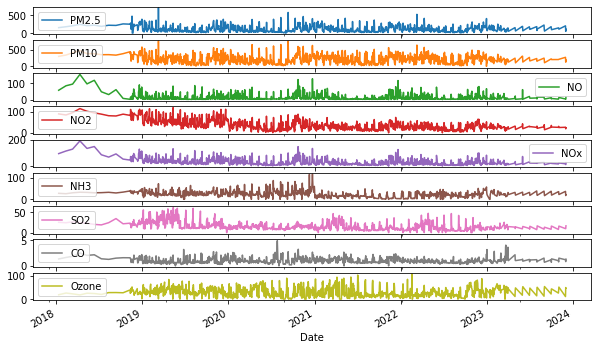

In [16]:
df.set_index('Date').plot(subplots=True, figsize=(10, 6));

In [17]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone
count,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000,1584.000000
mean,108.129369,205.144167,12.437986,35.528693,29.033150,23.019110,14.879274,0.984640,29.054444
std,84.814240,124.918880,17.297627,22.241997,22.958229,13.816443,9.540332,0.496326,19.160414
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.482500,103.907500,2.540000,18.502500,12.807500,14.817500,8.507500,0.650000,14.727500
50%,81.520000,187.915000,4.815000,31.060000,21.870000,21.330000,12.185000,0.860000,25.230000
75%,147.590000,286.555000,14.845000,47.030000,37.627500,30.060000,18.960000,1.200000,41.510000
max,712.110000,758.400000,155.110000,120.010000,191.260000,117.380000,61.500000,4.880000,106.920000


In [18]:
df['Date'].min() , df['Date'].max()

(Timestamp('2018-01-12 00:00:00'), Timestamp('2023-12-03 00:00:00'))

In [19]:
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)

In [20]:
df

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone
Date,,,,,,,,,
2018-11-11,251.16,439.83,1.75,83.25,45.69,39.29,23.07,1.57,39.13
2018-12-11,235.81,340.70,4.97,80.06,46.58,35.29,13.32,1.54,44.63
2018-11-13,285.09,428.91,16.67,111.32,72.80,41.51,21.87,1.34,31.22
2018-11-14,144.36,205.45,6.34,96.49,56.09,35.79,12.56,1.00,41.93
2018-11-15,109.24,154.94,6.91,77.06,46.79,30.92,12.69,0.65,28.81
...,...,...,...,...,...,...,...,...,...
2023-03-24,97.99,182.33,8.68,22.01,18.55,16.49,13.73,1.76,29.68
2023-03-25,36.00,75.71,2.91,14.66,10.17,15.53,13.44,1.39,54.00
2023-03-26,57.16,152.12,2.01,12.07,8.06,14.60,14.79,1.35,48.79


In [21]:
dataset=pd.DataFrame()

In [22]:
def PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

dataset["PM2.5_SubIndex"]=df["PM2.5"].apply(lambda x: PM25_subindex(x))

In [23]:
def PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

dataset["PM10_SubIndex"] = df["PM10"].apply(lambda x: PM10_subindex(x))

In [24]:
def SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

dataset["SO2_SubIndex"] = df["SO2"].apply(lambda x: SO2_subindex(x))

In [25]:
def NOx_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

dataset["NOx_SubIndex"] = df["NOx"].apply(lambda x: NOx_subindex(x))

In [26]:
def NH3_subindex(x):
    if x <= 200:
        return x * 50 / 200
    elif x <= 400:
        return 50 + (x - 200) * 50 / 200
    elif x <= 800:
        return 100 + (x - 400) * 100 / 400
    elif x <= 1200:
        return 200 + (x - 800) * 100 / 400
    elif x <= 1800:
        return 300 + (x - 1200) * 100 / 600
    elif x > 1800:
        return 400 + (x - 1800) * 100 / 600
    else:
        return 0

dataset["NH3_SubIndex"] = df["NH3"].apply(lambda x: NH3_subindex(x))

In [27]:
def CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

dataset["CO_SubIndex"] = df["CO"].apply(lambda x: CO_subindex(x))

In [28]:
def Ozone_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

dataset["Ozone_SubIndex"] = df["Ozone"].apply(lambda x: Ozone_subindex(x))

In [29]:
def NO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

dataset["NO2_SubIndex"] = df["NO2"].apply(lambda x: NO2_subindex(x))

In [30]:
def NO_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

dataset["NO_SubIndex"] = df["NO"].apply(lambda x: NO_subindex(x))

In [31]:
dataset

,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,Ozone_SubIndex,NO2_SubIndex,NO_SubIndex
Date,,,,,,,,,
2018-11-11,400.892308,412.287500,28.8375,57.1125,9.8225,78.5,39.13,103.2500,2.1875
2018-12-11,389.084615,290.700000,16.6500,58.2250,8.8225,77.0,44.63,100.0600,6.2125
2018-11-13,426.992308,398.637500,27.3375,91.0000,10.3775,67.0,31.22,131.3200,20.8375
2018-11-14,318.738462,170.300000,15.7000,70.1125,8.9475,50.0,41.93,116.4900,7.9250
2018-11-15,264.133333,136.626667,15.8625,58.4875,7.7300,32.5,28.81,96.3250,8.6375
...,...,...,...,...,...,...,...,...,...
2023-03-24,226.633333,154.886667,17.1625,23.1875,4.1225,88.0,29.68,27.5125,10.8500
2023-03-25,60.000000,75.710000,16.8000,12.7125,3.8825,69.5,54.00,18.3250,3.6375
2023-03-26,95.266667,134.746667,18.4875,10.0750,3.6500,67.5,48.79,15.0875,2.5125


In [32]:
print(dataset.max())

PM2.5_SubIndex    755.469231
PM10_SubIndex     810.500000
SO2_SubIndex       76.875000
NOx_SubIndex      211.260000
NH3_SubIndex       29.345000
CO_SubIndex       136.000000
Ozone_SubIndex    110.176471
NO2_SubIndex      140.010000
NO_SubIndex       175.110000
dtype: float64


In [33]:
dataset['AQI']=dataset.max(axis=1)
dataset

,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,Ozone_SubIndex,NO2_SubIndex,NO_SubIndex,AQI
Date,,,,,,,,,,
2018-11-11,400.892308,412.287500,28.8375,57.1125,9.8225,78.5,39.13,103.2500,2.1875,412.287500
2018-12-11,389.084615,290.700000,16.6500,58.2250,8.8225,77.0,44.63,100.0600,6.2125,389.084615
2018-11-13,426.992308,398.637500,27.3375,91.0000,10.3775,67.0,31.22,131.3200,20.8375,426.992308
2018-11-14,318.738462,170.300000,15.7000,70.1125,8.9475,50.0,41.93,116.4900,7.9250,318.738462
2018-11-15,264.133333,136.626667,15.8625,58.4875,7.7300,32.5,28.81,96.3250,8.6375,264.133333
...,...,...,...,...,...,...,...,...,...,...
2023-03-24,226.633333,154.886667,17.1625,23.1875,4.1225,88.0,29.68,27.5125,10.8500,226.633333
2023-03-25,60.000000,75.710000,16.8000,12.7125,3.8825,69.5,54.00,18.3250,3.6375,75.710000
2023-03-26,95.266667,134.746667,18.4875,10.0750,3.6500,67.5,48.79,15.0875,2.5125,134.746667


In [34]:
dataset['AQI'].max()

810.5

In [35]:
dataset_500 = dataset[(dataset["AQI"] > 500)].index
dataset.drop(dataset_500, axis=0, inplace=True)
df.drop(dataset_500, axis=0, inplace=True)
dataset

,PM2.5_SubIndex,PM10_SubIndex,SO2_SubIndex,NOx_SubIndex,NH3_SubIndex,CO_SubIndex,Ozone_SubIndex,NO2_SubIndex,NO_SubIndex,AQI
Date,,,,,,,,,,
2018-11-11,400.892308,412.287500,28.8375,57.1125,9.8225,78.5,39.13,103.2500,2.1875,412.287500
2018-12-11,389.084615,290.700000,16.6500,58.2250,8.8225,77.0,44.63,100.0600,6.2125,389.084615
2018-11-13,426.992308,398.637500,27.3375,91.0000,10.3775,67.0,31.22,131.3200,20.8375,426.992308
2018-11-14,318.738462,170.300000,15.7000,70.1125,8.9475,50.0,41.93,116.4900,7.9250,318.738462
2018-11-15,264.133333,136.626667,15.8625,58.4875,7.7300,32.5,28.81,96.3250,8.6375,264.133333
...,...,...,...,...,...,...,...,...,...,...
2023-03-24,226.633333,154.886667,17.1625,23.1875,4.1225,88.0,29.68,27.5125,10.8500,226.633333
2023-03-25,60.000000,75.710000,16.8000,12.7125,3.8825,69.5,54.00,18.3250,3.6375,75.710000
2023-03-26,95.266667,134.746667,18.4875,10.0750,3.6500,67.5,48.79,15.0875,2.5125,134.746667


In [36]:
pollutant_counts = {}

for _, row in dataset.iterrows():
    aqi_value = row['AQI']
    
    # Iterate over each column in the row
    for column, value in row.iteritems():
        if column != 'AQI' and value == aqi_value:
            # Increment the count for the pollutant in the dictionary
            pollutant_counts[column] = pollutant_counts.get(column, 0) + 1

print(pollutant_counts)

{'PM10_SubIndex': 667, 'PM2.5_SubIndex': 819, 'NO2_SubIndex': 19, 'CO_SubIndex': 44, 'Ozone_SubIndex': 4}


In [37]:
dataset_aqi=pd.DataFrame(dataset['AQI'])
dataset_aqi

,AQI
Date,
2018-11-11,412.287500
2018-12-11,389.084615
2018-11-13,426.992308
2018-11-14,318.738462
2018-11-15,264.133333
...,...
2023-03-24,226.633333
2023-03-25,75.710000
2023-03-26,134.746667


In [38]:
dataset_aqi=dataset_aqi.loc[(dataset_aqi.index >= '01-01-2019') & (dataset_aqi.index < '01-01-2023')]
dataset_aqi

,AQI
Date,
2019-01-01,445.907692
2019-02-01,468.646154
2019-03-01,498.462500
2019-04-01,378.584615
2019-05-01,381.846154
...,...
2022-12-26,350.676923
2022-12-27,329.576923
2022-12-28,335.107692


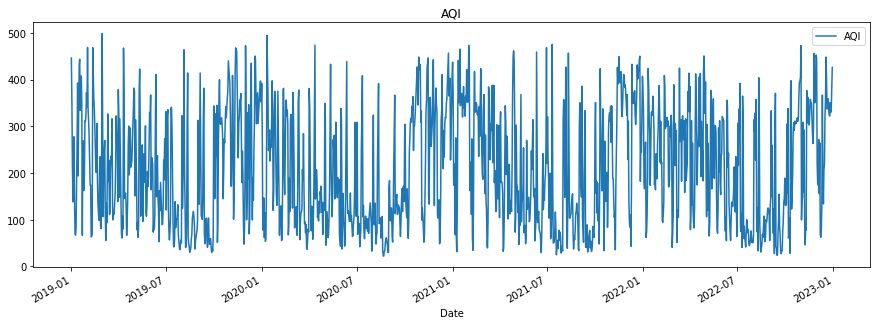

In [39]:
dataset = dataset_aqi.loc[(dataset_aqi.index >= '01-01-2019') & (dataset_aqi.index < '01-01-2023')]
df = df.loc[(df.index >= '01-01-2019') & (df.index < '01-01-2023')]
dataset.plot(figsize=(15, 5), title = 'AQI' )
plt.show()

In [40]:
df

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone
Date,,,,,,,,,
2019-01-01,309.68,455.39,33.18,109.18,84.52,49.80,24.83,1.69,23.91
2019-02-01,339.24,470.53,26.17,114.99,82.50,50.43,24.89,1.87,22.00
2019-03-01,367.25,508.77,50.08,110.56,99.33,51.87,25.19,1.94,19.59
2019-04-01,222.16,346.00,12.63,100.05,63.50,46.38,19.16,1.36,12.58
2019-05-01,226.40,326.12,8.18,95.78,57.27,46.20,22.14,1.39,19.91
...,...,...,...,...,...,...,...,...,...
2022-12-26,185.88,280.28,17.37,35.16,32.90,41.84,7.83,1.18,8.53
2022-12-27,158.45,198.93,5.02,25.19,17.50,47.37,7.10,1.13,29.93
2022-12-28,165.64,220.97,2.20,26.59,15.59,42.74,9.23,0.97,46.16


In [41]:
df_new=pd.concat([df, dataset], axis=1)
df_new

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,AQI
Date,,,,,,,,,,
2019-01-01,309.68,455.39,33.18,109.18,84.52,49.80,24.83,1.69,23.91,445.907692
2019-02-01,339.24,470.53,26.17,114.99,82.50,50.43,24.89,1.87,22.00,468.646154
2019-03-01,367.25,508.77,50.08,110.56,99.33,51.87,25.19,1.94,19.59,498.462500
2019-04-01,222.16,346.00,12.63,100.05,63.50,46.38,19.16,1.36,12.58,378.584615
2019-05-01,226.40,326.12,8.18,95.78,57.27,46.20,22.14,1.39,19.91,381.846154
...,...,...,...,...,...,...,...,...,...,...
2022-12-26,185.88,280.28,17.37,35.16,32.90,41.84,7.83,1.18,8.53,350.676923
2022-12-27,158.45,198.93,5.02,25.19,17.50,47.37,7.10,1.13,29.93,329.576923
2022-12-28,165.64,220.97,2.20,26.59,15.59,42.74,9.23,0.97,46.16,335.107692


In [42]:
df_new.AQI.skew()

0.33623950665697727

In [43]:
def create_feature(dataframe):
    dataframe = dataframe.copy()
    dataframe['day_of_the_week'] = dataframe.index.dayofweek
    dataframe['Quarter'] = dataframe.index.quarter
    dataframe['Month'] = dataframe.index.month
    dataframe['Year'] = dataframe.index.year
    dataframe['Week'] = dataframe.index.isocalendar().week.astype(int)
    return dataframe

df_date = create_feature(dataset)
df_date.dtypes

AQI                float64
day_of_the_week      int64
Quarter              int64
Month                int64
Year                 int64
Week                 int32
dtype: object

In [44]:
Features = ['day_of_the_week', 'Quarter','Month', 'Year', 'Week']
target = ['AQI']

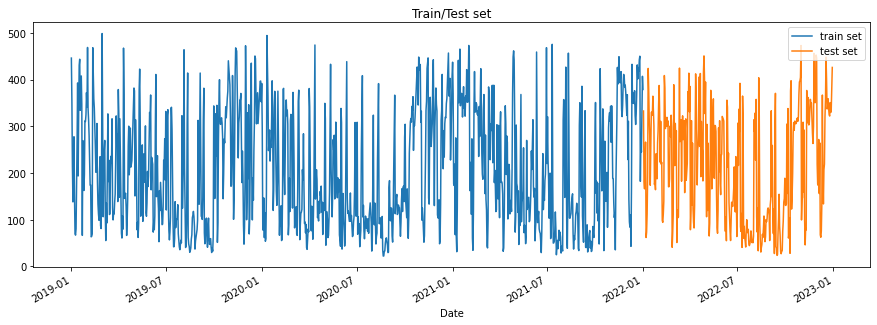

In [45]:
# xgboost
df_train = df_date.loc[df_date.index <= '2022-01-01'].copy()
df_test = df_date.loc[df_date.index > '2022-01-01'].copy()

#plot train/test
fig, ax = plt.subplots(figsize = (15,5))
df_train.AQI.plot(ax = ax, label = 'train set',legend = 'train set', title = 'Train/Test set')
df_test.AQI.plot(ax = ax, legend = 'train set', label = 'test set')
plt.show()

In [46]:
X_train = df_train[Features]
X_test = df_test[Features]

y_train = df_train[target]
y_test = df_test[target]

In [47]:
! pip install xgboost

In [48]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators = 1000, early_stopping_rounds = 50, learning_rate = 0.01).fit(X_train, y_train, eval_set = [(X_train,y_train), (X_test,y_test)], verbose = 50)

[0]	validation_0-rmse:235.00415	validation_1-rmse:244.75664
[50]	validation_0-rmse:162.63186	validation_1-rmse:170.58319
[100]	validation_0-rmse:123.52098	validation_1-rmse:131.21585
[150]	validation_0-rmse:102.91612	validation_1-rmse:112.38129
[200]	validation_0-rmse:91.94624	validation_1-rmse:103.79432
[250]	validation_0-rmse:85.95070	validation_1-rmse:100.13493
[300]	validation_0-rmse:82.21713	validation_1-rmse:99.05729
[350]	validation_0-rmse:79.52909	validation_1-rmse:98.95988
[374]	validation_0-rmse:78.41526	validation_1-rmse:99.07468


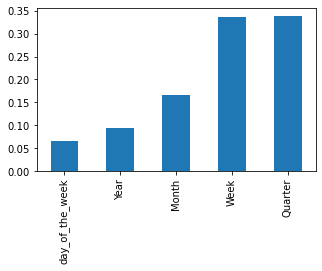

In [49]:
fea_Imp = pd.DataFrame(model.feature_importances_, index = Features, columns = ['feature_importance'])
#plot the features importance
fea_Imp.feature_importance.sort_values().plot(kind = 'bar', figsize =(5,3))
plt.show()

In [50]:
df_test['prediction'] = model.predict(X_test)

In [51]:
df_test

,AQI,day_of_the_week,Quarter,Month,Year,Week,prediction
Date,,,,,,,
2022-02-01,387.276923,1,1,2,2022,5,291.387939
2022-03-01,388.992308,1,1,3,2022,9,269.534058
2022-04-01,385.423077,4,2,4,2022,13,195.662552
2022-05-01,394.707692,6,2,5,2022,17,137.862747
2022-06-01,240.666667,2,2,6,2022,22,180.670517
...,...,...,...,...,...,...,...
2022-12-26,350.676923,0,4,12,2022,52,230.725388
2022-12-27,329.576923,1,4,12,2022,52,263.100922
2022-12-28,335.107692,2,4,12,2022,52,275.882019


In [52]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(df_test['AQI'],df_test['prediction'])
print(mse)

9776.973015513538


In [53]:
rmse = np.sqrt(mse)
rmse

98.87857713131565

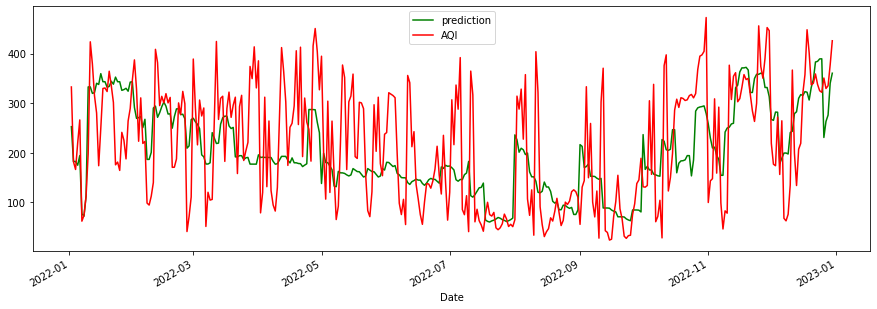

In [54]:
fig, ax = plt.subplots( figsize = (15,5))
df_test.prediction.plot(ax = ax, color = 'g', legend = 'Prediction')
df_test.AQI.plot(ax = ax, color = 'r', legend = 'Testing')
plt.show()

In [55]:
# Resample data as quarterly 
df_week = df_new.resample('W').mean()

In [56]:
df_week

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,AQI
Date,,,,,,,,,,
2019-01-06,152.744000,275.032000,15.346000,67.672000,48.194000,32.090000,34.584000,0.964000,39.602000,286.237846
2019-01-13,86.446667,158.460000,4.316667,50.855000,30.425000,24.468333,13.855000,0.825000,29.616667,172.074274
2019-01-20,217.695714,331.155714,28.128571,87.172857,69.375714,40.255714,28.590000,1.455714,26.207143,363.461905
2019-01-27,104.650000,159.112857,9.245714,56.975714,37.892857,30.195714,25.972857,0.727143,28.471429,225.732601
2019-02-03,188.391429,275.637143,12.622857,78.624286,52.150000,38.624286,31.905714,1.060000,25.008571,352.608791
...,...,...,...,...,...,...,...,...,...,...
2022-12-04,160.232857,316.588571,40.402857,43.385714,56.210000,21.748571,14.235714,1.154286,24.778571,304.342857
2022-12-11,68.974286,163.238571,5.022857,16.734286,13.034286,21.431429,9.391429,0.641429,33.772857,161.132564
2022-12-18,142.415714,250.540000,19.528571,35.654286,34.728571,33.620000,10.675714,0.938571,34.917143,269.181538


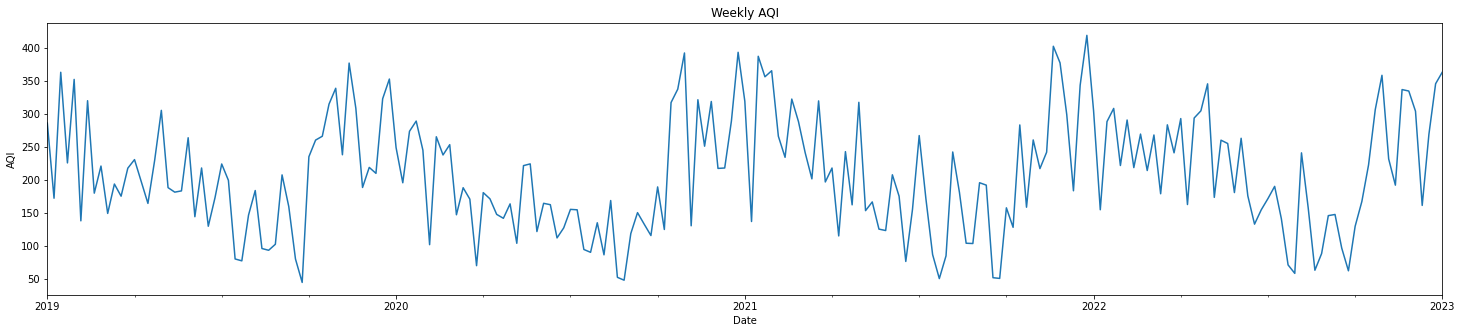

In [57]:
df_week.AQI.plot(figsize = (25,5), title = 'Weekly AQI')
plt.ylabel('AQI')
plt.show()

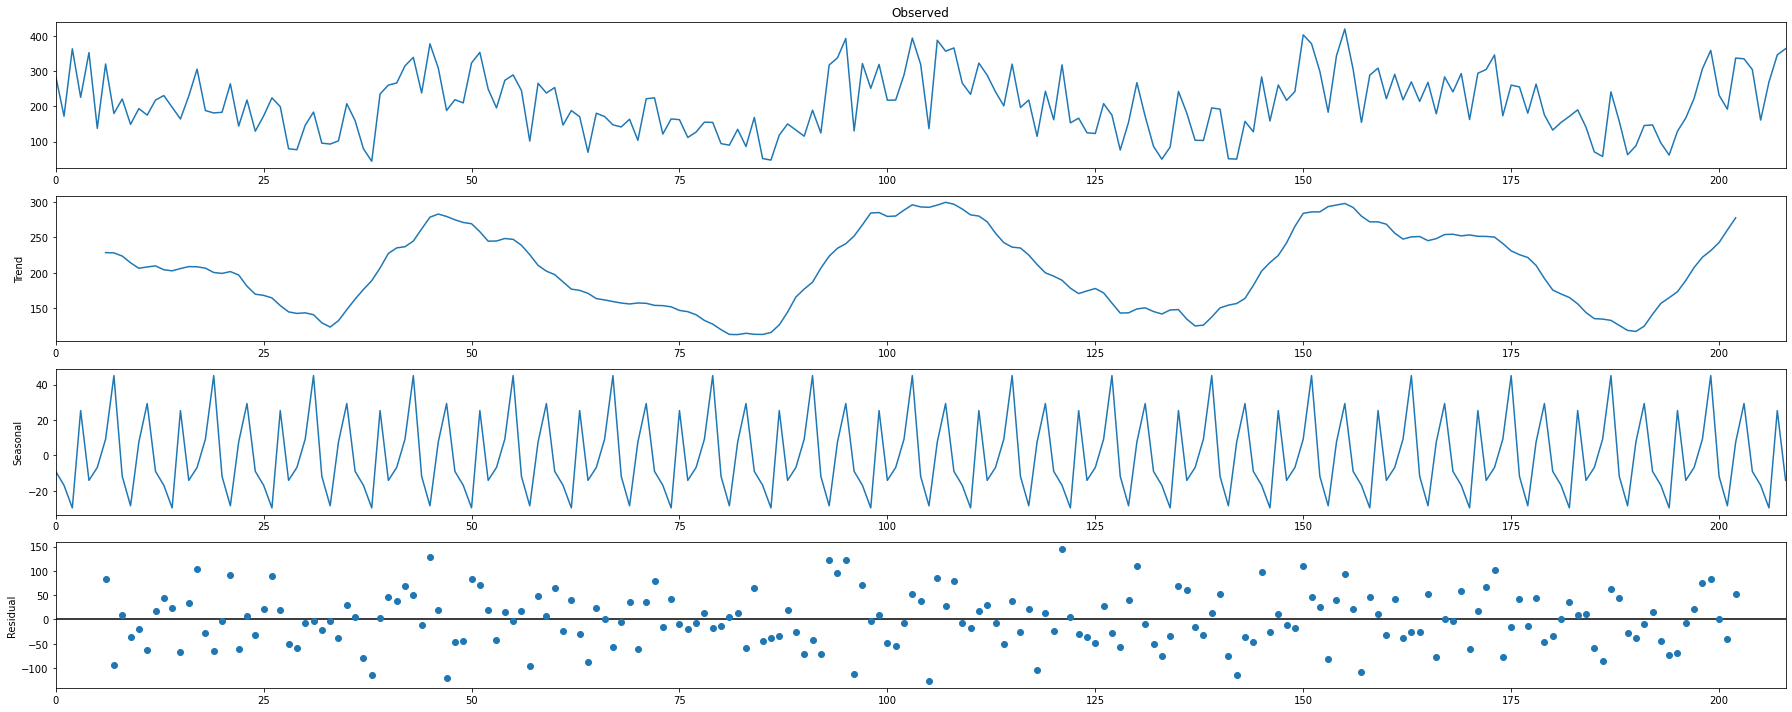

In [58]:
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose
rcParams['figure.figsize'] = 25, 10
decomposition = seasonal_decompose(df_week.AQI.values, model='additive', period = 12)
                   
fig = decomposition.plot()
plt.show()

In [59]:
# dickey-fuller test to check the stationarity
from statsmodels.tsa.stattools import adfuller

# ho - non stationary
# h1 - stationary
def adfuller_test(demand):
    result=adfuller(demand)
    labels=['ADF in Statistics', 'p-value', 'lags used', 'number of observations used']
    for value,label in zip(result, labels):
        print(label+ ' : '+str(value))
        if result[1]<=0.05:
            print("strong evidence against null hypo, reject null hypo")
        else:
            print("weak evidence against null hypo, non-stationary")

In [60]:
adfuller_test(df_week['AQI'])

ADF in Statistics : -3.6428764913139395
strong evidence against null hypo, reject null hypo
p-value : 0.004992288844533534
strong evidence against null hypo, reject null hypo
lags used : 14
strong evidence against null hypo, reject null hypo
number of observations used : 194
strong evidence against null hypo, reject null hypo


In [61]:
df_lstm=df_new.reset_index()['AQI']
df_lstm

0       445.907692
1       468.646154
2       498.462500
3       378.584615
4       381.846154
           ...    
1413    350.676923
1414    329.576923
1415    335.107692
1416    377.361538
1417    425.900000
Name: AQI, Length: 1418, dtype: float64

In [62]:
df_new1=df_new
df_new1

,PM2.5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,AQI
Date,,,,,,,,,,
2019-01-01,309.68,455.39,33.18,109.18,84.52,49.80,24.83,1.69,23.91,445.907692
2019-02-01,339.24,470.53,26.17,114.99,82.50,50.43,24.89,1.87,22.00,468.646154
2019-03-01,367.25,508.77,50.08,110.56,99.33,51.87,25.19,1.94,19.59,498.462500
2019-04-01,222.16,346.00,12.63,100.05,63.50,46.38,19.16,1.36,12.58,378.584615
2019-05-01,226.40,326.12,8.18,95.78,57.27,46.20,22.14,1.39,19.91,381.846154
...,...,...,...,...,...,...,...,...,...,...
2022-12-26,185.88,280.28,17.37,35.16,32.90,41.84,7.83,1.18,8.53,350.676923
2022-12-27,158.45,198.93,5.02,25.19,17.50,47.37,7.10,1.13,29.93,329.576923
2022-12-28,165.64,220.97,2.20,26.59,15.59,42.74,9.23,0.97,46.16,335.107692


In [63]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,2))
df_new1=scaler.fit_transform(np.array(df_new1).reshape(-1,1))

In [64]:
print(df_new1)

[[1.21736738]
 [1.79016058]
 [0.13043222]
 ...
 [0.00570002]
 [0.13707569]
 [1.67423394]]


In [65]:
training_size=int(len(df_new1)*0.75)
test_size=len(df_new1)-training_size
train_data,test_data=df_new1[0:training_size,:],df_new1[training_size:len(df_new1),:1]

In [66]:
training_size,test_size

(10635, 3545)

In [67]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [68]:
time_step = 91
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [69]:
print(X_train.shape), print(y_train.shape)

(10543, 91)
(10543,)


(None, None)

In [70]:
print(X_test.shape), print(ytest.shape)

(3453, 91)
(3453,)


(None, None)

In [71]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [72]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.layers import LSTM, Dropout, Dense, LeakyReLU

In [73]:
# model=Sequential()
# model.add(LSTM(128, input_shape=(91,1), return_sequences=True))
# model.add(LeakyReLU(alpha=0.01))
# model.add(LSTM(32, return_sequences=True))
# model.add(LeakyReLU(alpha=0.01))
# model.add(Dropout(0.3))
# model.add(LSTM(16, return_sequences=False))
# model.add(Dropout(0.3)) 
# model.add(Dense(1))
# model.summary()

model=Sequential()
model.add(LSTM(256,return_sequences=True,input_shape=(91,1)))
model.add(LeakyReLU(alpha=0.01))
model.add(LSTM(128,return_sequences=True))
model.add(LeakyReLU(alpha=0.01))
model.add(LSTM(64,return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(32,return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(16, return_sequences=True))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [74]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 91, 256)           264192    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 91, 256)           0         
                                                                 
 lstm_1 (LSTM)               (None, 91, 128)           197120    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 91, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 91, 64)            49408     
                                                                 
 dropout (Dropout)           (None, 91, 64)            0         
                                                                 
 lstm_3 (LSTM)               (None, 91, 32)            1

In [75]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=40,batch_size=64,verbose=1)

Epoch 1/40
165/165 [==============================] - 150s 787ms/step - loss: 0.1377 - val_loss: 0.1460
Epoch 2/40
165/165 [==============================] - 149s 904ms/step - loss: 0.1338 - val_loss: 0.1459
Epoch 3/40
165/165 [==============================] - 141s 856ms/step - loss: 0.1331 - val_loss: 0.1459
Epoch 4/40
165/165 [==============================] - 143s 865ms/step - loss: 0.1328 - val_loss: 0.1455
Epoch 5/40
165/165 [==============================] - 142s 860ms/step - loss: 0.1326 - val_loss: 0.1454
Epoch 6/40
165/165 [==============================] - 143s 867ms/step - loss: 0.1324 - val_loss: 0.1452
Epoch 7/40
165/165 [==============================] - 143s 866ms/step - loss: 0.1322 - val_loss: 0.1452
Epoch 8/40
165/165 [==============================] - 142s 862ms/step - loss: 0.1322 - val_loss: 0.1452
Epoch 9/40
165/165 [==============================] - 143s 869ms/step - loss: 0.1322 - val_loss: 0.1452
Epoch 10/40
165/165 [==============================] - 143s 870m

In [76]:
import tensorflow as tf
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

108/108 [==============================] - 19s 174ms/step


In [79]:
train_predict = train_predict.reshape(-1, 1)
test_predict = test_predict.reshape(-1, 1)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [80]:
train_predict[0]

array([63.148197], dtype=float32)

In [82]:
test_predict = test_predict[:len(ytest)]
import math
math.sqrt(mean_squared_error(ytest,test_predict))

63.418435192380585

In [86]:
look_back=91

# Assuming train_predict is a 2-dimensional array (shape: (959413, 1))
# and look_back is an integer representing the number of previous time steps

# Create trainPredictPlot with the same shape as df_new1, filled with NaNs
trainPredictPlot = np.full_like(df_new1, np.nan)

# Set the region where the predictions will be plotted
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# Rest of the code remains unchanged
testPredictPlot = np.empty_like(df_new1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_new1)-1, :] = test_predict

# Plot baseline and predictions
plt.plot(scaler.inverse_transform(df_new1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()



ValueError: could not broadcast input array from shape (959413,1) into shape (14089,1)

In [87]:
plt.plot(scaler.inverse_transform(df_new1[len(train_predict)+(look_back*2)+1:len(df_new1)-1, :]), label='Actual')
plt.plot(test_predict, label='Predicted')
plt.legend(['Actual', 'Predicted'])

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

In [ ]:
from keras.layers import Bidirectional

In [80]:
model=Sequential()
model.add(Bidirectional(LSTM(128,return_sequences=True,input_shape=(91,1))))
model.add(Bidirectional(LSTM(64,return_sequences=True)))
model.add(Bidirectional(LSTM(16)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [81]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
16/16 [==============================] - 64s 2s/step - loss: 0.0461 - val_loss: 0.0238
Epoch 2/100
16/16 [==============================] - 14s 876ms/step - loss: 0.0258 - val_loss: 0.0207
Epoch 3/100
16/16 [==============================] - 10s 578ms/step - loss: 0.0250 - val_loss: 0.0191
Epoch 4/100
16/16 [==============================] - 9s 568ms/step - loss: 0.0234 - val_loss: 0.0179
Epoch 5/100
16/16 [==============================] - 9s 539ms/step - loss: 0.0220 - val_loss: 0.0173
Epoch 6/100
16/16 [==============================] - 13s 852ms/step - loss: 0.0215 - val_loss: 0.0166
Epoch 7/100
16/16 [==============================] - 9s 583ms/step - loss: 0.0211 - val_loss: 0.0171
Epoch 8/100
16/16 [==============================] - 10s 623ms/step - loss: 0.0208 - val_loss: 0.0171
Epoch 9/100
16/16 [==============================] - 10s 637ms/step - loss: 0.0206 - val_loss: 0.0164
Epoch 10/100
16/16 [==============================] - 10s 634ms/step - loss: 0.0203 - va

In [82]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

9/9 [==============================] - 1s 99ms/step


In [83]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [84]:
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

235.63152256681795

In [85]:
math.sqrt(mean_squared_error(ytest,test_predict))

240.00693664932786

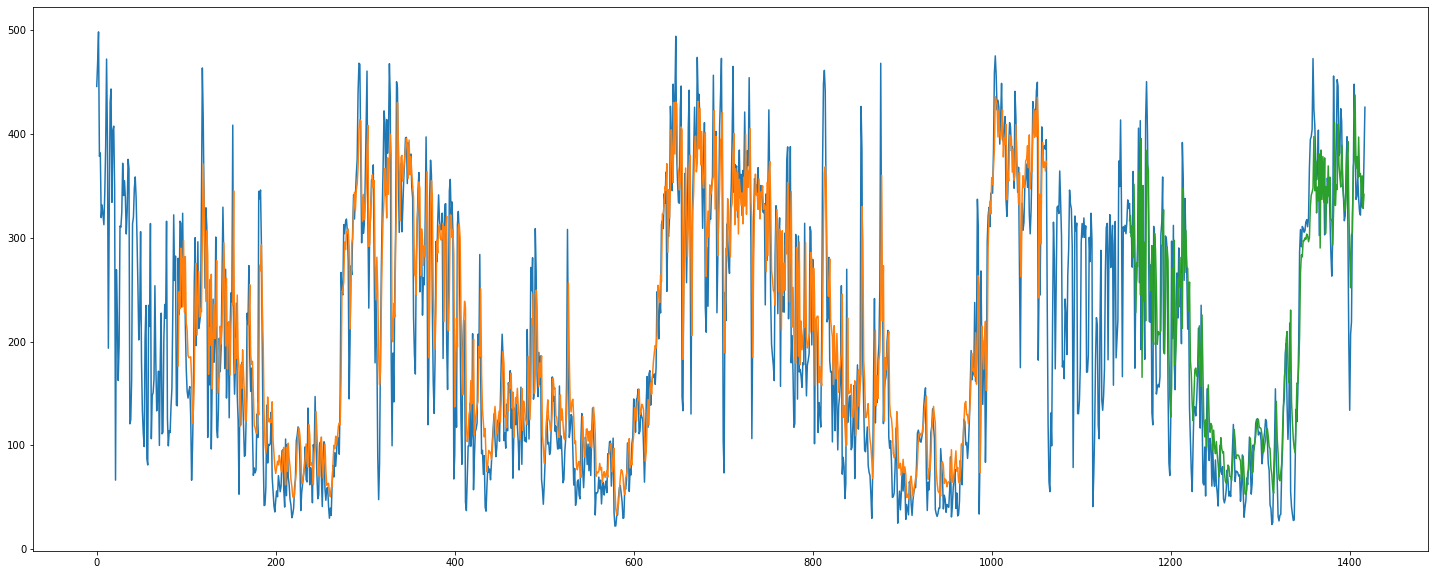

In [86]:
look_back=91
trainPredictPlot = np.empty_like(df_lstm)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df_lstm)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_lstm)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_lstm))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

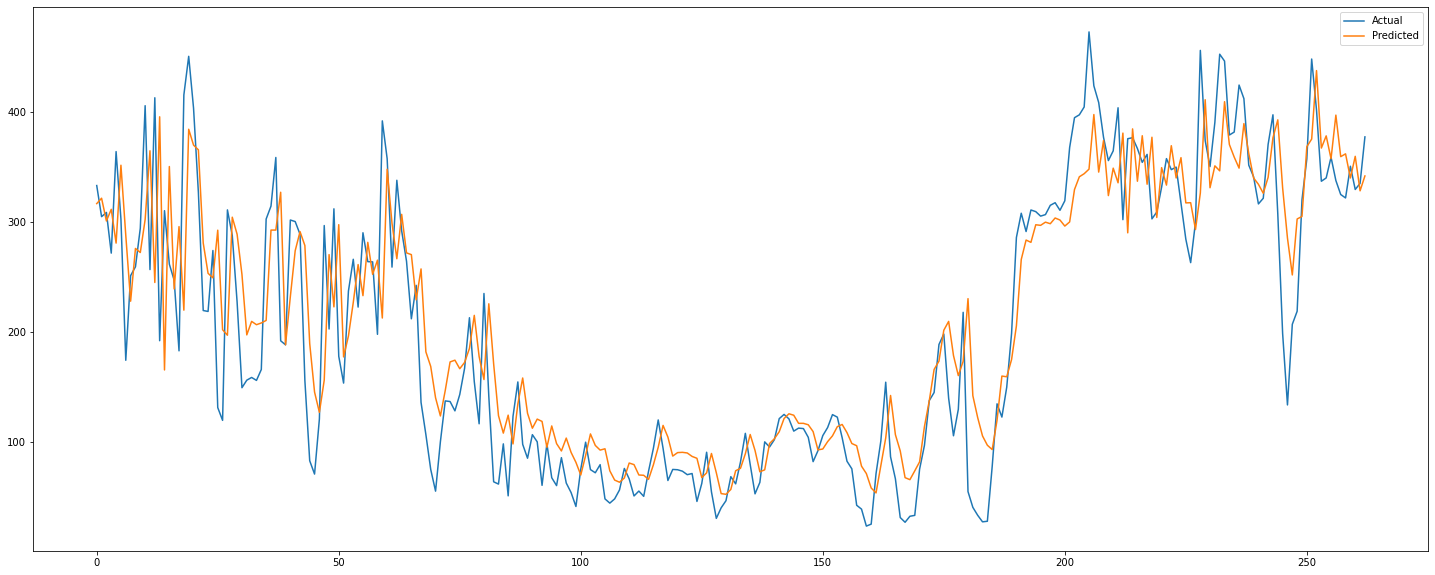

In [87]:
plt.plot(scaler.inverse_transform(df_lstm[len(train_predict)+(look_back*2)+1:len(df_lstm)-1, :]), label='Actual')
plt.plot(test_predict, label='Predicted')
plt.legend(['Actual', 'Predicted'])

In [88]:
# Grid Search
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [89]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_new['AQI'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [114]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
mod = SARIMAX(df_new['AQI'],order=(1,0,1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\vaish\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6416      0.027     23.694      0.000       0.589       0.695
ma.L1          0.1021      0.034      2.964      0.003       0.035       0.170
ar.S.L12      -0.4815      0.020    -24.675      0.000      -0.520      -0.443
sigma2      5355.2948    161.720     33.115      0.000    5038.329    5672.261


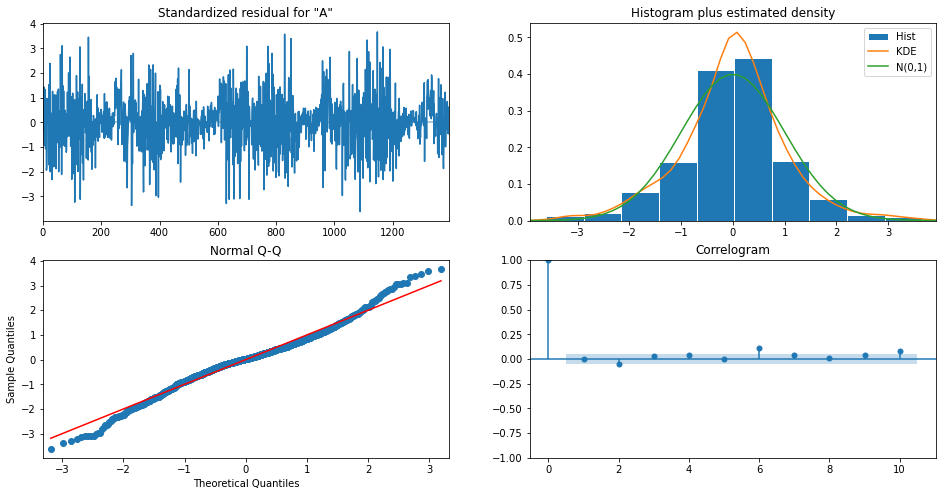

In [115]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

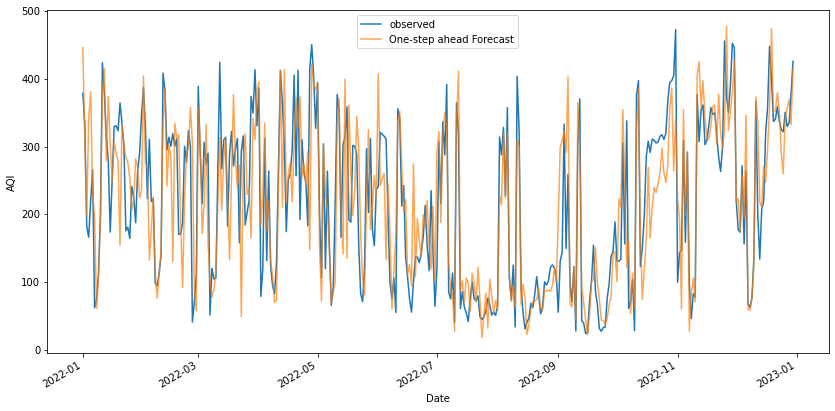

In [116]:
pred = results.get_prediction(start=pd.to_datetime('2022-01-01'), dynamic=False) #false is when using the entire history.
#Confidence interval.
pred_ci = pred.conf_int()

#Plotting real and forecasted values.
ax = df_new['AQI']['2022':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
# ax.fill_between(pred_ci.index,
#                 pred_ci.iloc[:, 0],
#                 pred_ci.iloc[:, 1], color='blue', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('AQI')
plt.legend()
plt.show()

In [117]:
y_forecasted = pred.predicted_mean
y_truth = df_new['AQI']['2022-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))
print('RMSE: {}'.format(round(np.sqrt(mse), 2)))

MSE 5439.85
RMSE: 73.76
